# <font color = '#0f0264'> 1. Punctul Static de Functionare </font>

Punctul Static de Functionare al unei componente electronice este definit de perechea de marimi electrice continue, *curent-tensiune*, specifice componentei electronice; prin marime electrica continua se intelege o marime electrica a carei valoare ramane constanta in timp.

In cazul dispozitivelor electronice (diode, tranzistoare), Punctul Static de Functionare indica intotdeauna regiunea in care dispozitivul respectiv functioneaza. Aceasta informatie este importanta deoarece comportamentul dispozitivului electronic depinde de regiunea in care acesta functioneaza.

Pentru o componenta electronica oarecare, **Punctul Static de Functionare** (prescurat P.S.F) este definit de catre perechea de marimi electrice urmatoare:
- **curentul continuu**, care trece prin componenta electronica
- **tensiunea continua**, care cade intre terminalele componentei electronice

In materialele video de mai jos sunt explicate notiunile de curent electric, respectiv de tensiune electrica.

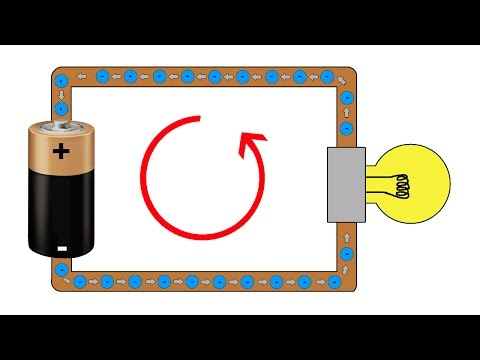

In [1]:
# CURENTUL ELECTRIC
from IPython.display import YouTubeVideo
YouTubeVideo('8gvJzrjwjds', width=400, height=300)

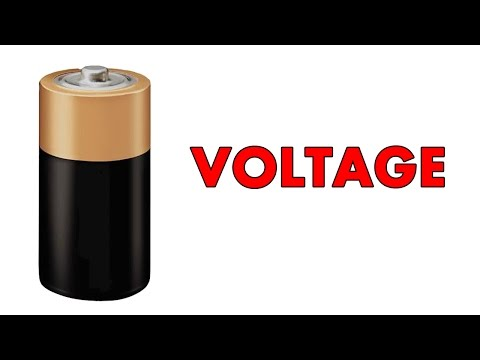

In [2]:
# TENSIUNEA ELECTRICA
from IPython.display import YouTubeVideo
YouTubeVideo('TBt-kxYfync', width=400, height=300)

**Observatie**: marimile electrice continue se noteaza conform regulii urmatoare:
- marimea electrica se noteaza cu **litera mare**
- indicele care identifica marimea electrica se noteaza cu **litera mare**

Exemplu:
- curent continuu: $I_A$
- tensiune continua: $V_A$

Analiza comportamentului unui circuit electronic implica parcurgerea urmatoarelor etape:
1. editarea circuitului electronic
2. simularea circuitului electronic
3. extragerea rezultatelor obtinute prin simulare
4. afisarea si analiza rezultatelor; masuratori

In continuare, se prezinta etapele 2 - 4, pentru cazul in care se doreste determinarea punctului static de functionare al unei componente. 

# <font color = '#0f0264'> 2. Simularea circuitului electronic </font>

Aceasta etapa implica urmatoarele:

    a. crearea unei instante a simulatorului si salvarea acesteia intr-o variabila;
    b. setarea analizei efectuate in cadrul simularii.

## a. Crearea unei instante a simulatorului 

Sintaxa PySpice utilizata pentru crearea unei instante a simulatorului si salvarea sa intr-o variabila este urmatoarea:

```python
    nume_variabila = instanta_circuit.simulator(temperature =..., nominal_temperature =...)
```

unde *temperature* si *nominal_temperature* reprezinta parametrii de temperatura ai simularii, necesari deoarece comportamentul componentelor electronice este dependent de temperatura la care acestea lucreaza; temperatura de lucru a componentelor este stocata in parametrul *temperature*; parametrul *nominal_temperature* stocheaza o valoare de referinta a temperaturii circuitului simulat.  

Exemplu:

```python
    # temperatura de lucru: 25 grade Celsius
    # temperature nominala: 25 grade Celsius
    # circuit = instanta Circuit()
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
```

## b. Setarea analizei efectuate asupra circuitului 

Exista 4 tipuri de analize fundamentale care pot fi aplicate asupra circuitului electronic, fiecare generand rezultate de tipuri diferite si anume:
1. analiza de punct static
2. analiza de curent continuu
3. analiza de regim tranzitoriu
4. analiza de curent alternativ


In cadrul acestei lucrari, se va introduce analiza care permite determinarea Punctului Static de Functionare al unei componente electronice  (*operating point analysis*).

Prin rularea analizei *operating point* asupra circuitului electornic, sunt calculate valorile numerice ale **potentialelor electrice in nodurile circuitului** si a **curentilor continui care trec prin componentele circuitului**. 

Sintaxa PySpice generala, utilizata pentru setarea unei analize, este urmatoarea:

```python
    instanta_analiza = instanta_simulator.tip_analiza(parametri_analiza)
```

unde *instanta_analiza* reprezinta o variabila care stocheaza rezultatele si parametrii analizei efectuate. 

In cazul analizei *operating point*, sintaxa PySpice este urmatoarea

```python
    instanta_analiza = instanta_simulator.operating_point()
```

Exemplu:

```python
    # analiza PSF
    analysis = simulator.operating_point()
```

# <font color = '#0f0264'> 3. Extragerea rezultatelor </font>

Dupa rularea unei analize asupra unui circuit, se pot extrage urmatoarele marimi electrice:
- potentialele electrice in nodurilor circuitului
- curentii electrici prin componentele circuitului

## 3.1. Extragerea potentialelor electrice din nodurile circuitului 

Se realizeaza prin utilizarea atributului `nodes`, aplicat prin intermediul operatorului `.` instantei analizei efectuate asupra circutirului:

```python
    instanta_analiza.nodes
```

Prin utilizarea atributului `nodes` se returneaza un dictionar (obiect Python din clasa `dict`). Accesarea informatiilor stocate intr-o variabila de tip `dict` se realizeaza prin apelarea metodelor implementate in clasa `dict`; o documentatie succinta despre metodele implementate in clasa `dict` se gaseste [aici](https://www.programiz.com/python-programming/dictionary). 

Fiecare element al dictionarului returnat prin utilizarea atributului `nodes` este definit printr-o pereche de tipul *cheie:valoare*, unde:
- *cheie*: reprezinta un obiect de tip `str`, care indica numele nodului circuitului
- *valoare*: reprezinta un obiect de tip `PySpice.Probe.WaveForm.WaveForm`, care stocheaza valoarea numerica a potentialului electric al nodului de circuit identificat prin valoarea *cheie* si unitatea de masura 

Cheile elementelor dictionarului returnat se extrag prin apelarea metodei `keys()`, implementata in clasa `dict`:

```python
    instanta_analiza.nodes.keys()
```

- metoda `keys()` returneaza o lista (un obiect Python de tip `list`) care contine toate cheile dictionarului; accesul individual la denumirea cheilor se poate realiza prin apelarea metodelor implementate in clasa `list`, sau prin utilizarea operatorului subscript `[]`, caruia i se paseaza indexul elementului stocat in lista;
- in cazul dictionarului returnat prin utilizarea atributului `nodes`, cheile dictionarului reprezinta nodurile circuitului.

Extragerea informatiilor stocate intr-un nod al circuitului, se realizeaza prin utilizarea operatorului subscript `[]`, caruia i se furnizeaza numele cheii care identifica nodul extras:

```python
    #extragere informatii nod circuit:
    instanta_analiza.nodes[cheie]
```

Comanda indicata mai sus, returneaza sub forma de obiect `WaveForm`, informatiile stocate in nodul identificat prin numele cheii, care constau in valoarea (valorile) potentialului electric din nodul repsectiv si unitatea de masura. 
<font color = 'red'> **Observatie**: valoarea numerica a potentialului electric intr-un nod de circuit este exprimata in unitatea fundamentala de masura a acestuia = Volt</font>


Exemplu:

```python
    # extragere informatii nod circuit:
    # valoare potential electric + unitate de masura
    analysis.nodes['1']
```

Extragerea individuala a valorii numerice a potentialului electric, respectiv a unitatii sale de masura, se pot realiza prin urmatoarele comenzi:

- extragerea valorii numerice a potentialului electric se realizeaza prin apelarea metodei `item()`:

```python
    # extragere informatii nod circuit:
    # valoare potential electric + unitate de masura
    instanta_analiza.nodes[cheie].item()
```

- extragerea unitatii de masura a potentialului electric se realizeaza prin utilizarea atributului `unit`:

```python
    # extragere informatii nod circuit:
    # valoare potential electric + unitate de masura
    instanta_analiza.nodes[cheie].unit
```

**Observatii:** 
1. in cazul in care se intentioneaza utilizarea informatiei stocate in nodul unui circuit in calcule numerice, se recomanda extragerea acesteia sub forma de obiect `Waveform`, deoarece in acest caz sunt pastrate atat valoarea numerica cat si unitatea de masura.
2. valoarea numerica a potentialului electric se poate rotunji prin apelarea functiei `round()` implementata in libraria `numpy`:

```python
    np.round(instanta_analiza.nodes[cheie], n)
```

unde parametrul *n* reprezinta numarul de zecimale cu care se rotunjeste valoarea potentialului electric, iar *np* reprezinta un alias al librariei `numpy`.

Exemplu:

```python
    # valoarea potentialului electric este rotunjita la 3 zecimale    
    np.round(analysis.nodes['1'], 3)
```

Mai jos se prezinta un exemplu de extragerea a informatiilor stocate intr-un nod de circuit identificat prin numele *out*, atat sub forma de obiect `Waveform`, cat si separat, valoare numerica, unitate masura:

Exemplu:

```python
    # waveform: contine atat valoare numerica cat si unitate masura
    v_out = analysis.nodes['out']
```


```python
    # rotunjire la 3 zecimale a potentialului electric in nodul "out"
    # import librarie numpy -> alias np
    import numpy as np
    
    # contine valoare numerica si unitatea de masura
    v_out_rounded = np.round(v_out, 3)
  
```

### Calculul valorii tensiunii electrice intre 2 noduri ale circuitului </font>

Tensiunea electrica care cade intre 2 noduri ale unui circuit, notate generic **A**, respectiv **B**, se noteaza cu $v_{AB}$ si se calculeaza cu relatia urmatoare:

$$ v_{AB} = v_A - v_B $$

**Observatii**:
1. ordinea celor 2 termeni $v_A$ si $v_B$, implicati in calcularea tensiunii electrice intre 2 noduri de circuit, depinde de sensul tensiunii electrice; daca, pentru exemplu considerat, se alege pentru tensiunea electrica sensul $A \rightarrow B$, atunci tensiunea electrica se noteaza $v_{AB}$ si se calculeaza cu relatia de mai sus; daca se alege pentru tensiunea electrica sensul $B \rightarrow A$, atunci tensiunea electrica se noteaza $v_{BA}$ si se calculeaza cu relatia $v_{BA} = v_B - v_A $;
2. <font color = 'red'> potentialul electric al masei circuitului este considerat, prin conventie, **0** volti. </font>

In PySpice, calculul valorii numerice a tensiunii electrice care cade intre 2 noduri de circuit si unitatea de masura a acesteia, se determina cu sintaxa urmatoare:

```python
    v_AB = instanta_analiza.nodes[cheie_nod_A] - instanta_analiza.nodes[cheie_nod_B]
```

Exemplu:

```python
    # calcul tensiune electrica intre nodurile 1 si 2
    # variabila V_12 este de tip Waveform:
    # contine atat valoare numerica cat si unitate de masura
    v_12 = analysis.nodes['1'] - analysis.nodes['2']
```


##  3.2. Extragerea informatiilor stocate in ramurile circuitului </font>

Extragerea informatiile stocate in ramurile circuitului permit in continuare determinarea curentilor electrici care trec prin elementele de circuit plasate in ramurile respective.

Pentru extragerea informatiilor stocate in ramurile circuitului este necesar ca in circuit, **inainte de analiza** acestuia, sa fie inserate **sonde de masura pentru curentul electric**, la terminalele componentelor electronice. 

Sonda de masura pentru curent se insereaza prin intermediul comenzilor PySpice:

```python
    nume_componenta.plus.add_current_probe(instanta_circuit)
```

sau 

```python
    nume_componenta.minus.add_current_probe(instanta_circuit)
```

unde:
- `plus` indica faptul ca sonda de masura este aplicata in sensul curentului electric, iar valoarea curentului electric va fi raportata cu semnul `+`,
- `minus` indica faptul ca sonda de masura este aplicata in sens contrar sensului curentului electric, iar valoarea curentului electric va fi raportata cu semnul `-`,
- *nume_componenta* indica componenta electronica prin care se masoara curentul electric,
- *instanta_circuit* indica instanta circuitului in care se efectueaza masuratorile de curent electric.

Extragerea informatiilor stocate in ramurile circuitului, in urma rularii unei analize se realizeaza prin comanda PySpice:

```python
    instanta_analiza.branches
```

care returneaza un dictionar (obiect Python din clasa `dict`); fiecare element al dictionarului returnat este definit printr-o pereche de tipul *cheie:valoare*, unde:
- *cheie*: este un obiect Python de tip `str`, care indica numele ramurii circuitului (care include numele componentei electronice asupra careia s-a inserat sonda de masura pentru curentul electric);
- *valoare*: este un obiect de tip `PySpice.Probe.WaveForm.WaveForm`, care indica atat valoarea curentului electric care trece prin ramura de circuit cat si unitatea de masura, unde ramura de circuit considerata este cea identificata prin *cheie*; 

<font color = 'red'> **Observatie**: valoarea numerica a curentului electric care trece printr-o ramura este furnizata in unitatea fundamentala de masura a acestuia = Amper</font>
  
Mai jos se indica un exemplu de script care extrage informatiile prin ramurile pe care sunt plasate componentele asupra carora au fost inserate sonde de masura pentru curentul electric si valorile curentilor electrici prin acestea:

```python
    
    #...

    # inserare sonde masura curenti
    R1.plus.add_current_probe(circuit)
    R2.plus.add_current_probe(circuit)
    
    # ...
     
    # extragere curenti ramuri de circuit:
    # Waveform ramura cu R1: curent + unitate masura
    i_R1 = analysis.branches['vr1_plus']
    # Waveform ramura cu R2: curent + unitate masura
    i_R2 = analysis.branches['vr2_plus']
    
```    

### Calculul valorii curentului electric pe baza potentialului electric intre 2 noduri ale circuitului </font>

In cazul in care, intre 2 noduri ale unui circuit, notate generic **A**, respectiv **B**, este conectat un rezistor de rezistenta electrica $R$, valoarea curentului electric prin aceasta se poate calcula pe baza legii lui Ohm cu relatia:

$$ i_{AB} = \frac{v_A - v_B}{R} $$

unde $v_A$ si $v_B$ sunt potentialele electrice in nodurile **A**, respectiv **B**.

In PySpice, calculul valorii numerice a curentului electric care trece print-un rezistor de rezistenta electrica $R$, conectat intre nodurile $A$ si $B$, se determina cu sintaxa urmatoare:

```python
    i_AB = (instanta_analiza.nodes[cheie_nod_A] - instanta_analiza.nodes[cheie_nod_B]) / instanta_rezistor.resistance
```
unde *instanta_rezistor* este numele variabilei utilizate pentru identificarea rezistorului considerat, iar `resistance` este un atribut al clasei `Resistor`, utilizata pentru crearea rezistoarelor.

Exemplu:

```python
    # calcul curent electric prin rezistorul R1
    # conectat intre nodurile 1 si 2
    # variabila i_R1 este de tip Waveform:
    # contine atat valoare numerica cat si unitate de masura
    i_R1 = (analysis.nodes['1'] - analysis.nodes['2']) / R1.resistance
```
